In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
import warnings
warnings.filterwarnings('ignore');

In [2]:
emp_train_df = pd.read_csv("C:\\Users\\USER\Downloads\\train_LZdllcl.csv")
emp_test_df = pd.read_csv("C:\\Users\\USER\\Downloads\\test_2umaH9m.csv")
# To add is_test_set column in training dataset to identify the type of dataset
emp_train_df['is_test_set']=0
# To add is_train_test column in test dataset
emp_test_df['is_test_set']=1
# To add is_promoted column in test dataset
emp_test_df['is_promoted']=np.nan

In [3]:
emp_train_df = emp_train_df[['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_test_set', 'is_promoted']]

In [4]:
emp_train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0


In [5]:
# Combining train and test data using pandas
emp_df = emp_train_df.append(emp_test_df)

In [6]:
print(emp_test_df.shape) 

(23490, 15)


In [7]:
print(emp_df.shape) 

(78298, 15)


In [8]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_test_set           78298 non-null  int64  
 14  is_promoted           54808 non-null  float64
dtypes: float64(2), int6

In [9]:
emp_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,is_promoted
count,78298.000000,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000
mean,39149.500000,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664,0.300008,0.085170
std,22602.830026,0.606766,7.665928,1.260982,4.248070,0.478222,0.150073,13.383664,0.458264,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,0.000000
25%,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,0.000000
50%,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,0.000000
75%,58723.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,1.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,1.000000


In [10]:
emp_df[emp_df.duplicated(['employee_id'], keep=False)]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,is_promoted


In [11]:
emp_df.isnull().sum(axis = 0)


employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_test_set                 0
is_promoted             23490
dtype: int64

In [12]:
emp_df['education']=emp_df['education'].fillna('Unknown')

# To replace the previous_year_rating : nan values with 2 (taking average rating) for easy data manupulation
emp_df['previous_year_rating']=emp_df['previous_year_rating'].fillna(2)

emp_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0.0


In [13]:
emp_df["is_promoted"].value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

In [14]:
promoted = emp_df[emp_df["is_promoted"]==1];
not_promoted = emp_df[emp_df["is_promoted"]==0];

In [15]:
print("Employees eligible for promotion:")
promoted.head()

Employees eligible for promotion:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,0,1.0
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51,0,1.0
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,0,1.0
66,77981,Finance,region_22,Bachelor's,m,other,1,27,2.0,1,1,1,58,0,1.0
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,2.0,1,0,0,61,0,1.0


In [16]:
print("\n\nEmployees not eligible for promotion:")
not_promoted.head()



Employees not eligible for promotion:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0.0


In [17]:
emp_df['region'] = emp_df['region'].str.replace('region_','')
emp_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,is_promoted
0,65438,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0.0
1,65141,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0.0
2,7513,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0.0
3,2542,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0.0
4,48945,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0.0


In [18]:
#Creating dummy variables for categorical datatypes
emp_df_dummies = pd.get_dummies(emp_df, columns=['department','region','education','recruitment_channel'])
emp_df_dummies.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,...,region_7,region_8,region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Unknown,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,f,1,35,5.0,8,1,0,49,0,...,1,0,0,0,0,1,0,0,0,1
1,65141,m,1,30,5.0,4,0,0,60,0,...,0,0,0,1,0,0,0,1,0,0
2,7513,m,1,34,3.0,7,0,0,50,0,...,0,0,0,1,0,0,0,0,0,1
3,2542,m,2,39,1.0,10,0,0,50,0,...,0,0,0,1,0,0,0,1,0,0
4,48945,m,1,45,3.0,2,0,0,73,0,...,0,0,0,1,0,0,0,1,0,0


In [19]:
gender_mapping = {'m': 1, 'f': 0}
emp_df_dummies['gender'] = emp_df['gender'].map(gender_mapping) 
emp_df_dummies.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_test_set,...,region_7,region_8,region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Unknown,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0,1,35,5.0,8,1,0,49,0,...,1,0,0,0,0,1,0,0,0,1
1,65141,1,1,30,5.0,4,0,0,60,0,...,0,0,0,1,0,0,0,1,0,0
2,7513,1,1,34,3.0,7,0,0,50,0,...,0,0,0,1,0,0,0,0,0,1
3,2542,1,2,39,1.0,10,0,0,50,0,...,0,0,0,1,0,0,0,1,0,0
4,48945,1,1,45,3.0,2,0,0,73,0,...,0,0,0,1,0,0,0,1,0,0


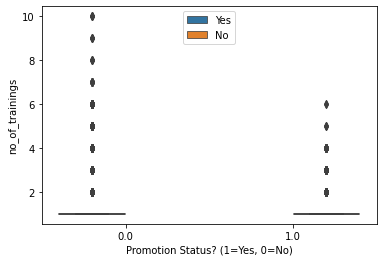

In [20]:
## Box-plot for no_of_trainings
ax = sns.boxplot(x="is_promoted", y="no_of_trainings", hue = "is_promoted", data=emp_df)  
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Yes", "No"], loc = "upper center")
plt.xlabel("Promotion Status? (1=Yes, 0=No)") 
plt.ylabel("no_of_trainings") 
plt.show()

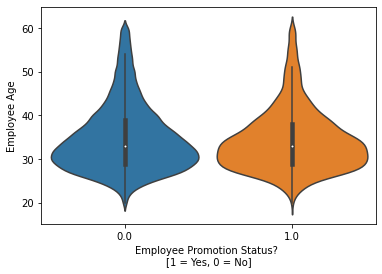

In [21]:
### A violin plot combines the benefits of Box-plot and PDF
#Let's have a look at employee age wise Violin Plot
sns.violinplot(x="is_promoted", y="age", data=emp_df, width=0.9)
plt.xlabel("Employee Promotion Status? \n[1 = Yes, 0 = No]") 
plt.ylabel("Employee Age") 
plt.show()

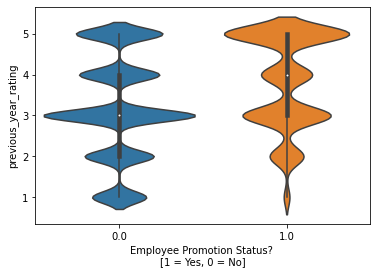

In [22]:
sns.violinplot(x="is_promoted", y="previous_year_rating", data=emp_df, width=0.9)
plt.xlabel("Employee Promotion Status? \n[1 = Yes, 0 = No]") 
plt.ylabel("previous_year_rating") 
plt.show()

Employee with previous year rating as 3 or 5 has more chances being promoted Employee with previous year rating as 1,2, or 4 has more chances NOT being promoted

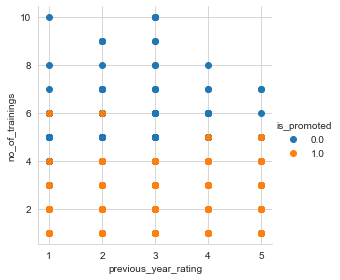

In [50]:
# Compare between previous_year_rating and no_of_trainings
sns.set_style("whitegrid");
sns.FacetGrid(emp_df, hue="is_promoted", size=4)\
   .map(plt.scatter, "previous_year_rating", "no_of_trainings")\
   .add_legend();
plt.show();

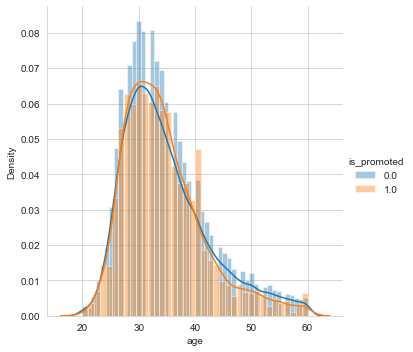

In [53]:
#Employee Age wise Promotion status
sns.FacetGrid(emp_df, hue="is_promoted", size=5)\
   .map(sns.distplot, "age")\
   .add_legend();

plt.show();

Employee between age 33-36 has more promotion chances

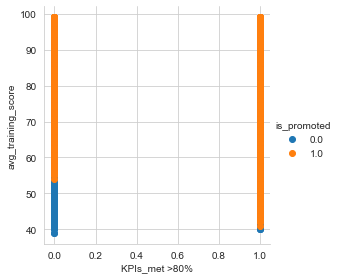

In [23]:
# Compare b/w avg_training_score and KPIs_met >80%
sns.set_style("whitegrid");
sns.FacetGrid(emp_df, hue="is_promoted", size=4)\
   .map(plt.scatter, "KPIs_met >80%", "avg_training_score")\
   .add_legend();
plt.show(); 


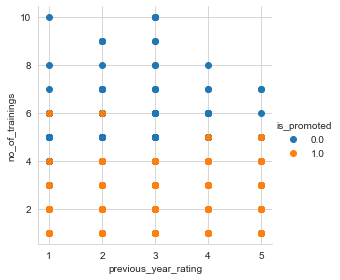

In [24]:
sns.set_style("whitegrid");
sns.FacetGrid(emp_df, hue="is_promoted", size=4)\
   .map(plt.scatter, "previous_year_rating", "no_of_trainings")\
   .add_legend();
plt.show();

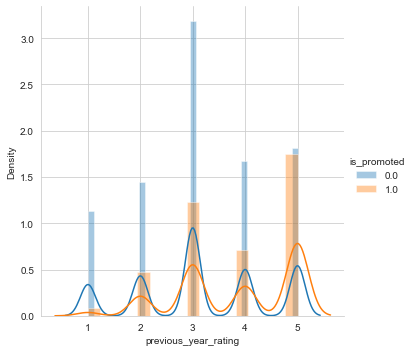

In [25]:
#Employee previous_year_rating wise Promotion status
sns.FacetGrid(emp_df, hue="is_promoted", size=5)\
   .map(sns.distplot, "previous_year_rating")\
   .add_legend();

plt.show();

Employee with rating 5 has higher chance of promotion.

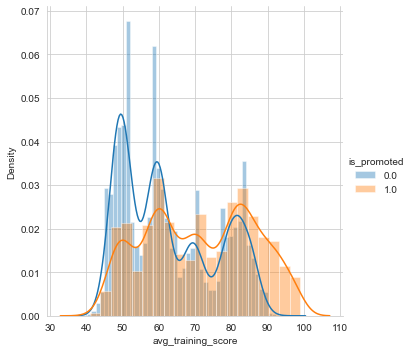

In [54]:
#Employee avg_training_score wise Promotion status
sns.FacetGrid(emp_df, hue="is_promoted", size=5)\
   .map(sns.distplot, "avg_training_score")\
   .add_legend();

plt.show();

Employee with avg_training_score b/w 45-55 has less chance of promotion, and 
Employee with avg_training_score > 85 has more chance of promotion

In [26]:
# To change the data type of previous_year_rating as int
emp_df_dummies[['previous_year_rating']] = emp_df_dummies[['previous_year_rating']].astype(int) 

In [27]:
# To change the sequence of columns and store the data points into final_df

final_df = emp_df_dummies[['gender', 'no_of_trainings', 'age', \
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%', \
       'awards_won?', 'avg_training_score', \
       'department_Analytics', 'department_Finance', 'department_HR', \
       'department_Legal', 'department_Operations', 'department_Procurement', \
       'department_R&D', 'department_Sales & Marketing', 'department_Technology', \
       'region_1', 'region_2', 'region_3', 'region_4', 'region_5', \
       'region_6', 'region_7', 'region_8', 'region_9', 'region_10', 'region_11', \
       'region_12', 'region_13', 'region_14', 'region_15', 'region_16', \
       'region_17', 'region_18', 'region_19', 'region_20', \
       'region_21', 'region_22', 'region_23', 'region_24', 'region_25', \
       'region_26', 'region_27', 'region_28', 'region_29', 'region_30', \
       'region_31', 'region_32', 'region_33', 'region_34', \
       'education_Below Secondary', 'education_Bachelor\'s', \
       'education_Master\'s & above', 'education_Unknown', \
       'recruitment_channel_referred', 'recruitment_channel_sourcing', \
       'recruitment_channel_other', 'is_test_set', 'is_promoted']];

In [28]:
train = final_df[final_df["is_test_set"] == 0]
test = final_df[final_df["is_test_set"] == 1]

# Remove is_test_set column from both train and test
del train['is_test_set']
del test['is_test_set']

# To check location of dependent variable/column
train.columns.get_loc("is_promoted")

58

In [29]:
# Assigning default value as Zero for now to test dataset for is_promoted column
test['is_promoted'] = 0.0

array = train.values
X_train = array[:,0:58] 
Y_train = array[:,58]

test_array = test.values
X_test = test_array[:,0:58] 
Y_test = test_array[:,58]

In [30]:
# To set test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))

In [56]:
results = []
names = []
for name, model in models:
    k_fold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.921818 (0.002407)
LDA: 0.933860 (0.002835)
KNN: 0.922602 (0.001994)
CART: 0.899631 (0.004321)
NB: 0.535014 (0.054583)
QDA: 0.654213 (0.170491)


We can see that it looks like LDA has the largest estimated accuracy score.

In [57]:
# Assigning default value as Zero for now to test dataset is_promoted
test['is_promoted'] = 0.0

# Make predictions on test dataset
test_array = test.values
X_test = test_array[:,0:58]
Y_test = test_array[:,58] 

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_test)

print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9693486590038314
[[22770   720]
 [    0     0]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     23490
         1.0       0.00      0.00      0.00         0

    accuracy                           0.97     23490
   macro avg       0.50      0.48      0.49     23490
weighted avg       1.00      0.97      0.98     23490



In [59]:
#To store the final predicted result for test dataset into sample_submission.csv

sample_submission_lda = emp_df_dummies.loc[(emp_df_dummies.is_test_set == 1), ['employee_id']]
sample_submission_lda['is_promoted'] = list(predictions)
sample_submission_lda = sample_submission_lr.astype({'is_promoted':'int'})
sample_submission_lda.to_csv('C:\\Users\\USER\\Downloads\\Result_Outcome.csv',index=False)